In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Gráfico de Tasa de Sobrevivientes por Grupo de Edad

Buscamos ver si se priorizó a menores en la evacuación


In [3]:
# Creación de nuevas columnas
df['Sexo'] = df['Sex'].map({'male': 'masculino', 'female': 'femenino'})
def categorize_age(age: float) -> str:
    if age < 18:
        return 'menor'
    elif 18 <= age < 60:
        return 'adulto'
    else:
        return 'adulto mayor'
df['AgeGroup'] = df['Age'].apply(categorize_age)

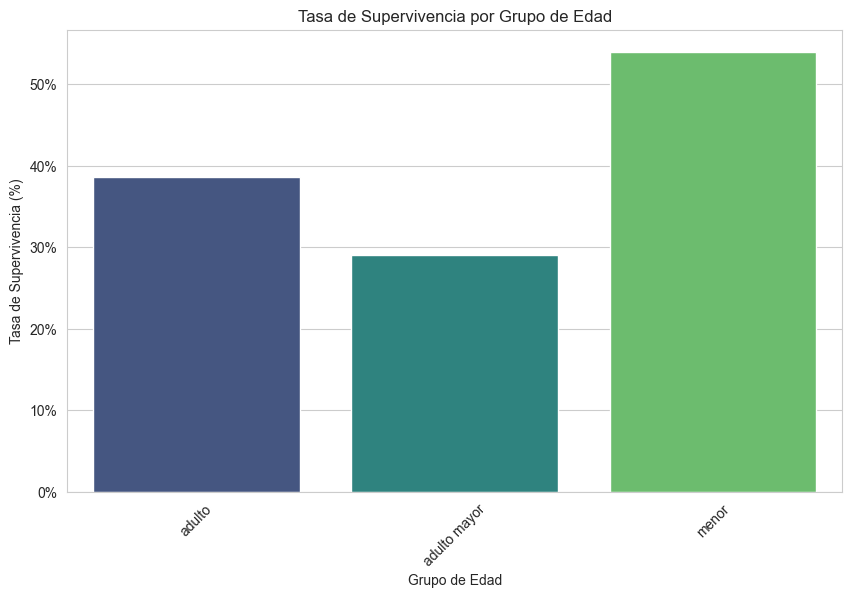

In [4]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=df, x='AgeGroup', y='Survived', palette='viridis', hue='AgeGroup', errorbar=None)
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks(rotation=45)
# mostrar como %
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
plt.show()

## Visualizar como la tarifa se relaciona a la supervivencia

Como `Fare` es una variable continua podemos ver como se distribuye en caso de sobrevivencia o no mediante el gráfico `boxplot`

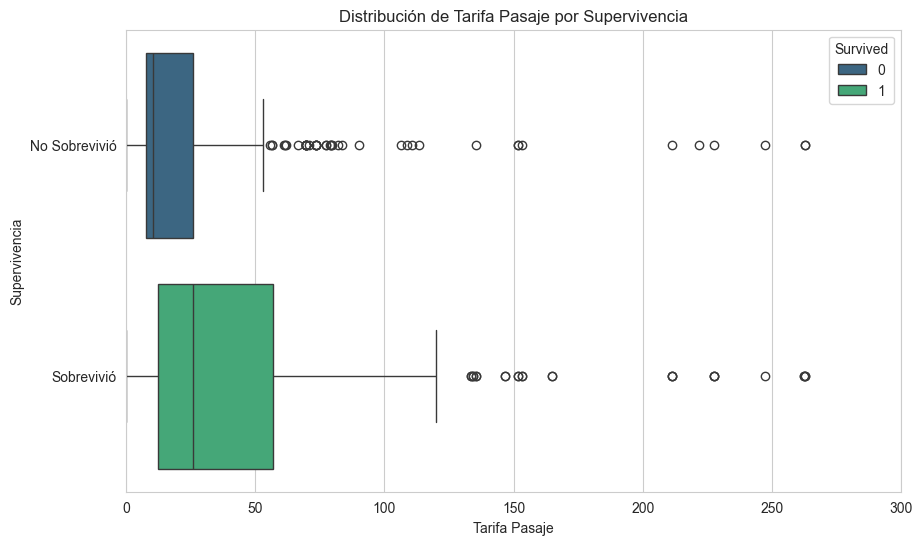

In [5]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# orient='h' cambia la orientación del gráfico boxplot
sns.boxplot(data=df, x='Fare', y='Survived', palette='viridis', hue='Survived', orient='h')
plt.title('Distribución de Tarifa Pasaje por Supervivencia')
plt.ylabel('Supervivencia')
plt.xlabel('Tarifa Pasaje')
# Limitar el eje x de 0 a 300
plt.xlim(0, 300)
plt.yticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.show()
